# Summary:  Research based code file for performing image classification using CNN and custom model architecture. 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import zipfile
from google.colab import drive
from tensorflow import keras
from keras import layers
from PIL import ImageFile
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import tensorflow as tf
import os

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.list_physical_devices(gpu)

In [ ]:
#Adding zip 
zip_paths = ['/content/drive/MyDrive/archive (26).zip']
train_data = tf.constant(zip_paths)
train_data = tf.data.Dataset.from_tensor_slices(train_data)

In [ ]:
# drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (26).zip", 'r')
zip_ref.extractall("/content/sample_data")
zip_ref.close()

In [ ]:
data_dir_train = "/content/sample_data/DATASET/TRAIN"
data_dir_test = "/content/sample_data/DATASET/TEST"

size = 256
img_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # vertical_flip=True,
)

X_train = img_gen_train.flow_from_directory(data_dir_train,
                                        batch_size=32,
                                        target_size=(size, size),
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        subset='training'
                                        )

X_val = img_gen_train.flow_from_directory(data_dir_train,
                                        batch_size=32,
                                        target_size=(size, size),
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        subset='validation'
                                        )

img_gen_test = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # vertical_flip=True,
)

X_test = img_gen_test.flow_from_directory(data_dir_test,
                                        batch_size=32,
                                        target_size=(256, 256),
                                        class_mode='categorical',
                                        color_mode='rgb'
                                        )

Found 866 images belonging to 5 classes.
Found 215 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


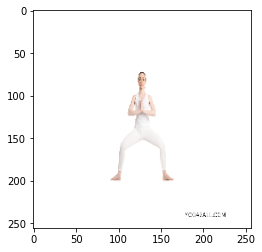

In [ ]:
#Showing a random image
plt.imshow(X_train[1][0][22])
plt.show()

In [ ]:
print(X_train.class_indices)
print(X_test.class_indices)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}
{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(filters=16,kernel_size=(5,5),strides=1, activation="relu",name = "ConvolutionLayer1",input_shape=(256, 256, 3)),
        layers.MaxPool2D(),

        layers.Conv2D(filters=32,kernel_size=(5,5),strides=1, activation="relu",name = "ConvolutionLayer2"),
        layers.MaxPool2D(),
     
        layers.Conv2D(filters=16,kernel_size=(5,5),strides=1, activation="relu",name = "ConvolutionLayer3"),
        layers.MaxPool2D(),
     
        layers.Conv2D(filters=32,kernel_size=(5,5),strides=1, activation="relu",name = "ConvolutionLayer4"),
        layers.MaxPool2D(),
     
        layers.Conv2D(filters=16,kernel_size=(5,5),strides=1, activation="relu",name = "ConvolutionLayer5"),
        layers.MaxPool2D(),
     
        layers.GlobalAveragePooling2D(),
     
        layers.Dense(112, activation="relu", name="layer1"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dropout(.2),
        layers.Dense(112, activation="relu", name="layer3"),

        # layers.Dense(32, activation="relu", name="layer2"),      
        layers.Dense(5 , name="output", activation="softmax"),
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer1 (Conv2D)  (None, 252, 252, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 ConvolutionLayer2 (Conv2D)  (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 ConvolutionLayer3 (Conv2D)  (None, 57, 57, 16)        12816     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

Train Deep Learning Model

In [ ]:
history = model.fit(X_train, validation_data=X_val, epochs=40, batch_size=32 )

Epoch 1/40
14/28 [==============>...............] - ETA: 6s - loss: 1.6102 - accuracy: 0.2201

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 26s 607ms/step - loss: 1.6027 - accuracy: 0.2344 - val_loss: 1.5942 - val_accuracy: 0.2326
Epoch 2/40
28/28 [==============================] - 16s 565ms/step - loss: 1.5999 - accuracy: 0.2309 - val_loss: 1.5998 - val_accuracy: 0.2465
Epoch 3/40
28/28 [==============================] - 17s 618ms/step - loss: 1.5979 - accuracy: 0.2460 - val_loss: 1.5936 - val_accuracy: 0.2465
Epoch 4/40
28/28 [==============================] - 17s 597ms/step - loss: 1.5942 - accuracy: 0.2460 - val_loss: 1.5927 - val_accuracy: 0.2465
Epoch 5/40
28/28 [==============================] - 16s 566ms/step - loss: 1.5951 - accuracy: 0.2471 - val_loss: 1.5898 - val_accuracy: 0.2465
Epoch 6/40
28/28 [==============================] - 17s 610ms/step - loss: 1.5775 - accuracy: 0.2390 - val_loss: 1.5905 - val_accuracy: 0.2326
Epoch 7/40
28/28 [==============================] - 16s 569ms/step - loss: 1.5817 - accuracy: 0.2367 - val_loss: 1.5604 - val_accuracy: 0.2465
Epoch 8/40

In [ ]:
model.evaluate(X_test)

12/15 [=======================>......] - ETA: 2s - loss: 0.7264 - accuracy: 0.8594

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


15/15 [==============================] - 13s 895ms/step - loss: 0.7955 - accuracy: 0.8489


[0.7954535484313965, 0.848936140537262]

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("custom_cnnmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("custom_cnnmodel.h5")
print("Saved model to disk")

Saved model to disk
